                  Results of Lok Sabha Elections 2024                   
                  ___________________________________                   
Data saved to C:\Users\Aaditya G\Desktop\Projects\Lok-Sabha-2024.csv


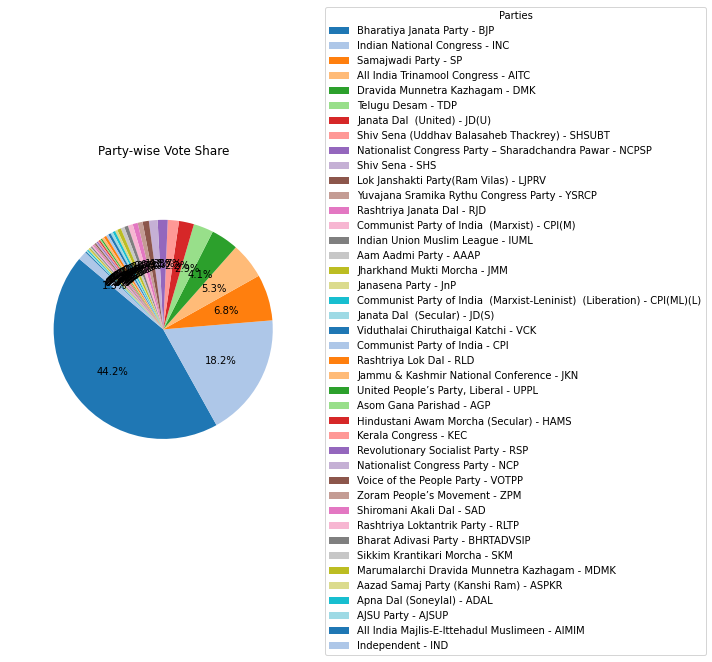

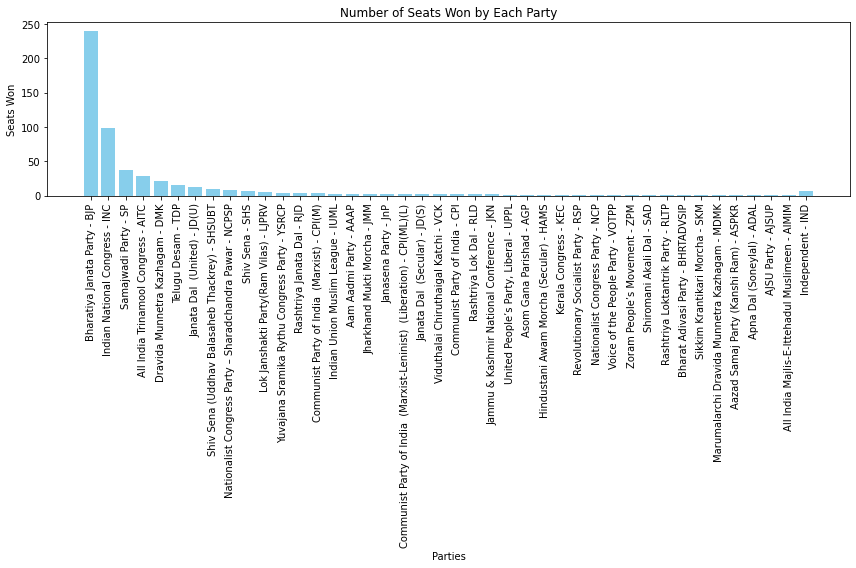

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

def fetch_election_results(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise exception for bad status codes
        soup = BeautifulSoup(response.content, 'html.parser')
        return soup
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

def extract_data(soup):
    try:
        tables = soup.find_all('table')
        headers = [ele.text.strip() for ele in soup.find_all('th')[0:4]]
        data = []

        for table in tables:
            rows = table.find_all('tr')[1:]
            for row in rows:
                cols = [ele.text.strip() for ele in row.find_all('td')]
                if len(cols) == len(headers):
                    data.append(cols)

        return pd.DataFrame(data, columns=headers)
    except Exception as e:
        print(f"Error extracting data: {e}")
        return pd.DataFrame()

def save_to_csv(df, path):
    try:
        df.to_csv(path, index=False)
        print(f"Data saved to {path}")
    except Exception as e:
        print(f"Error saving data: {e}")

def load_and_clean_csv(path):
    try:
        df = pd.read_csv(path)
        df.dropna(inplace=True)
        df.columns = df.columns.str.strip()
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return pd.DataFrame()

def plot_pie_chart(df):
    try:
        plt.figure(figsize=(10, 8))
        colors = plt.cm.tab20.colors
        wedges, _, autotexts = plt.pie(df['Won'], autopct='%1.1f%%', startangle=140, colors=colors)
        plt.legend(wedges, df['Party'], title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        plt.axis('equal')
        plt.title('Party-wise Vote Share')
        plt.tight_layout()
        plt.savefig('party_wise_vote_share.png')
        plt.show()
    except Exception as e:
        print(f"Error plotting pie chart: {e}")

def plot_bar_chart(df):
    try:
        plt.figure(figsize=(12, 8))
        plt.bar(df['Party'], df['Won'].astype(int), color='skyblue')
        plt.xlabel('Parties')
        plt.ylabel('Seats Won')
        plt.title('Number of Seats Won by Each Party')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.savefig('seats_won_by_party.png')
        plt.show()
    except Exception as e:
        print(f"Error plotting bar chart: {e}")

def main():
    print("                  Results of Lok Sabha Elections 2024                   ")
    print("                  ___________________________________                   ")

    url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
    soup = fetch_election_results(url)

    if soup:
        df = extract_data(soup)
        save_to_csv(df, r'C:\Users\Aaditya G\Desktop\Projects\Lok-Sabha-2024.csv')

        df = load_and_clean_csv('election_results.csv')

        if not df.empty:
            plot_pie_chart(df)
            plot_bar_chart(df)
        else:
            print("DataFrame is empty. No data to plot.")
    else:
        print("No data fetched. Exiting.")

if __name__ == "__main__":
    main()
